In [1]:
import nltk
import re
import requests
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Read in txt file

In [2]:
f = open("data/the_odyssey_translated_by_robert_fagles.txt", "r",encoding='utf8')
content = f.read()
f.close()
#text = nltk.word_tokenize(text)

## Tokenize Main Text of The Odyssey

In [3]:
text = re.findall(r"BOOK ONE\n\n\n\n\n\n(.*)\n\n\n\n\n\nTRANSLATOR’S POSTSCRIPT", content, re.DOTALL)[0]
words = nltk.word_tokenize(text)
len(words)

150540

In [4]:
# words = []

# with open('data/the_odyssey_translated_by_robert_fagles.txt','r',encoding='utf8') as infile:
#     for line in infile:
#         for word in nltk.word_tokenize(line):
#             words.append(word)

## Read in Character Index & Clean Data

In [5]:
df = pd.read_excel('data/characters_index.xlsx')
df.head()

,Name,Pronunciation,Description
0,ACASTUS,a-kas’-tus,"king of Dulichion, ref."
1,ACHAEA,a-kee’-a,"general, collective name for mainland Greece,..."
2,ACHAEANS,a-kee’-unz,"collective name for all Greek people, includi..."
3,ACHERON,a’-ker-on,"a river in the underworld, ref. See note ad loc."
4,ACHILLES,a-kil’-eez,"son of Peleus and Thetis, grandson of Aeacus,..."


In [6]:
df['Name'] = df['Name'].apply(lambda x: x.title())
df.head()

,Name,Pronunciation,Description
0,Acastus,a-kas’-tus,"king of Dulichion, ref."
1,Achaea,a-kee’-a,"general, collective name for mainland Greece,..."
2,Achaeans,a-kee’-unz,"collective name for all Greek people, includi..."
3,Acheron,a’-ker-on,"a river in the underworld, ref. See note ad loc."
4,Achilles,a-kil’-eez,"son of Peleus and Thetis, grandson of Aeacus,..."


## Frequency of Names

In [7]:
# create a dictionary
name_list = df['Name'].values
names = {}

for name in name_list:
    if name not in names.keys():
        names[name] = 0

In [8]:
# name count
for i in words:
    if i in name_list:
        names[i] += 1

In [9]:
# order by frequency
{k: v for k, v in sorted(names.items(), key=lambda item: item[1],reverse=True)}

{'Odysseus': 549,
 'Zeus': 248,
 'Telemachus': 207,
 'Athena': 143,
 'Penelope': 85,
 'Laertes': 62,
 'Alcinous': 58,
 'Eumaeus': 58,
 'Menelaus': 58,
 'Antinous': 54,
 'Circe': 48,
 'Nestor': 48,
 'Dawn': 46,
 'Poseidon': 39,
 'Pallas': 35,
 'Agamemnon': 33,
 'Cyclops': 33,
 'Death': 33,
 'Achaeans': 31,
 'Eurymachus': 29,
 'Hermes': 29,
 'Apollo': 28,
 'Phaeacians': 26,
 'Helen': 25,
 'Achaea': 24,
 'Calypso': 23,
 'Aegisthus': 22,
 'Olympus': 22,
 'Argos': 21,
 'Mentor': 20,
 'Achilles': 19,
 'Icarius': 18,
 'Atreus': 17,
 'Ocean': 17,
 'Scylla': 17,
 'Trojans': 17,
 'Argives': 16,
 'Autolycus': 16,
 'Artemis': 15,
 'Tiresias': 15,
 'Atrides': 14,
 'Eurycleia': 14,
 'Neleus': 14,
 'Dolius': 13,
 'Eurylochus': 13,
 'Melanthius': 13,
 'Pisistratus': 13,
 'Amphinomus': 12,
 'Arete': 12,
 'Eupithes': 12,
 'Irus': 12,
 'Polybus': 12,
 'Aphrodite': 11,
 'Dulichion': 11,
 'Nausicaa': 11,
 'Ajax': 10,
 'Charybdis': 10,
 'Cronus': 10,
 'Demodocus': 10,
 'Egypt': 10,
 'Hephaestus': 10,
 'Pele

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

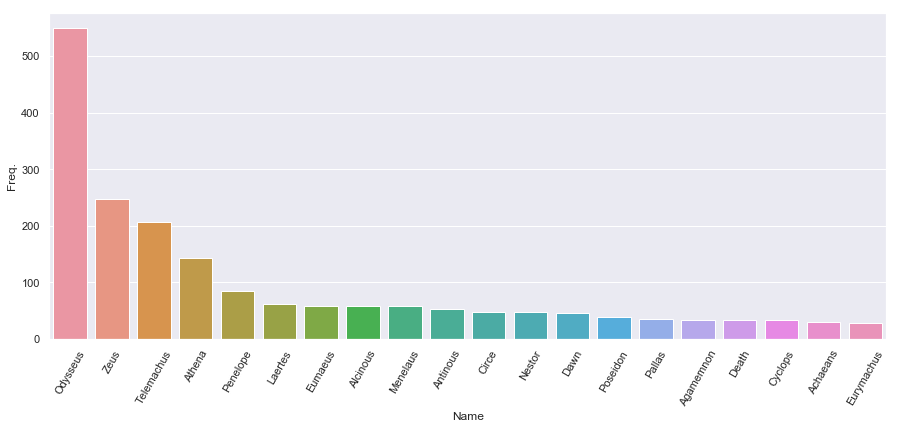

In [10]:
nameCount=pd.DataFrame(names.items(),columns=['Name','Freq.'])

plt.figure(figsize=(15,6))
sns.barplot(x='Name',y='Freq.',data=nameCount.sort_values(by='Freq.',ascending=False)[:20])
plt.xticks(rotation=60)

## Alternative Version of Transalation, from Gutenberg

In [11]:
res = requests.get('http://www.gutenberg.org/files/1727/1727-0.txt')
text = nltk.word_tokenize(res.text)

In [12]:
name_list = df['Name'].values
names = {}

for name in name_list:
    if name not in names.keys():
        names[name] = 0

for i in text:
    if i in name_list:
        names[i] += 1

In [13]:
{k: v for k, v in sorted(names.items(), key=lambda item: item[1],reverse=True)}

{'Telemachus': 238,
 'Penelope': 107,
 'Eumaeus': 67,
 'Achaeans': 60,
 'Alcinous': 59,
 'Menelaus': 57,
 'Phaeacians': 54,
 'Antinous': 49,
 'Laertes': 44,
 'Nestor': 35,
 'Calypso': 34,
 'Circe': 32,
 'Agamemnon': 31,
 'Aegisthus': 27,
 'Apollo': 27,
 'Pisistratus': 25,
 'Helen': 24,
 'Dawn': 23,
 'Eurymachus': 23,
 'Melanthius': 23,
 'Argives': 21,
 'Scylla': 20,
 'Argos': 19,
 'Atreus': 18,
 'Trojans': 17,
 'Nausicaa': 16,
 'Mentor': 15,
 'Achilles': 14,
 'Charybdis': 14,
 'Eurynome': 14,
 'Arete': 13,
 'Cyclops': 13,
 'Demodocus': 13,
 'Eurylochus': 13,
 'Autolycus': 12,
 'Dolius': 12,
 'Lacedaemon': 12,
 'Neleus': 12,
 'Olympus': 12,
 'Egypt': 11,
 'Medon': 11,
 'Philoetius': 11,
 'Polybus': 11,
 'Danaans': 10,
 'Icarius': 10,
 'Irus': 10,
 'Orestes': 10,
 'Sirens': 10,
 'Theoclymenus': 10,
 'Amphinomus': 9,
 'Megapenthes': 9,
 'Peleus': 9,
 'Phemius': 9,
 'Aeolus': 8,
 'Agelaus': 8,
 'Idomeneus': 8,
 'Laodamas': 8,
 'Polyphemus': 8,
 'Sparta': 8,
 'Ajax': 7,
 'Parnassus': 7,
 'P

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

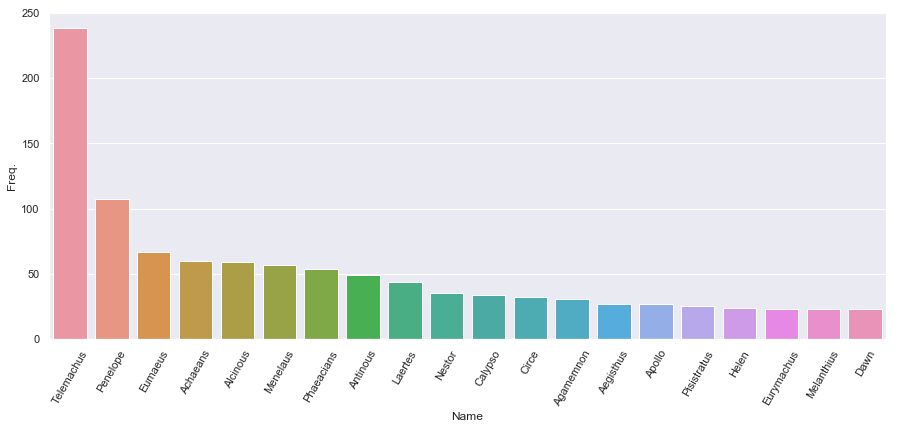

In [14]:
nameCount=pd.DataFrame(names.items(),columns=['Name','Freq.'])

plt.figure(figsize=(15,6))
sns.barplot(x='Name',y='Freq.',data=nameCount.sort_values(by='Freq.',ascending=False)[:20])
plt.xticks(rotation=60)